In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
houseprices_data = pd.read_csv('./data/HousingPrices-Amsterdam-August-2021.csv')

houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]

In [4]:
houseprices_data.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [5]:
houseprices_data.shape

(924, 4)

In [6]:
houseprices_data.dtypes

Zip       object
Price    float64
Area       int64
Room       int64
dtype: object

In [27]:
# [Create a price per sql variable based on the price and area variables]

houseprices_data['PriceperSqm'] = houseprices_data['Price'] / houseprices_data['Area']

In [8]:
houseprices_data.head()

,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


# Visualizing data in Matplotlib

In [10]:
houseprices_sorted = houseprices_data.sort_values('Price', ascending=False)

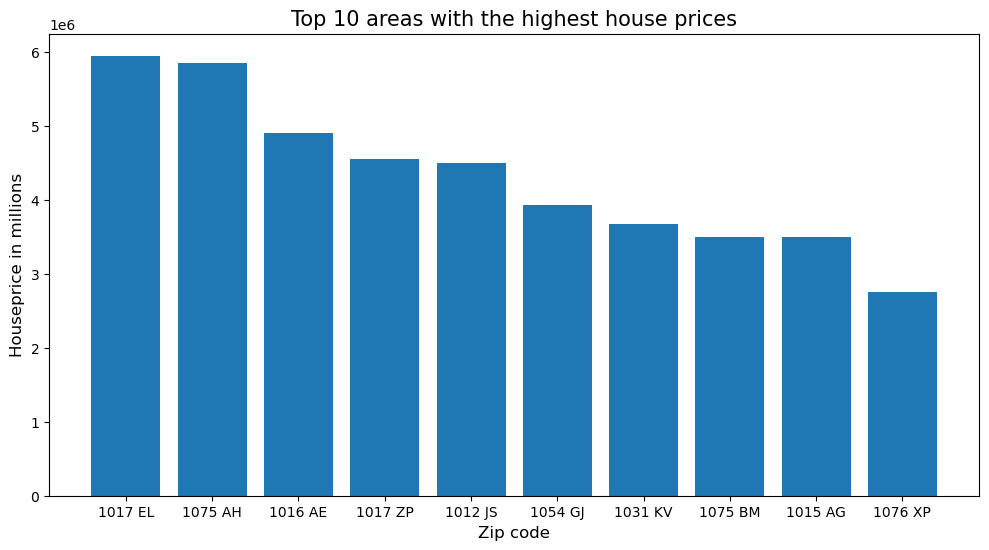

In [13]:
plt.figure(figsize=(12, 6))

x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]

plt.bar(x, y)
plt.title("Top 10 areas with the highest house prices", fontsize=15)
plt.xlabel('Zip code', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Houseprice in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

<BarContainer object of 10 artists>

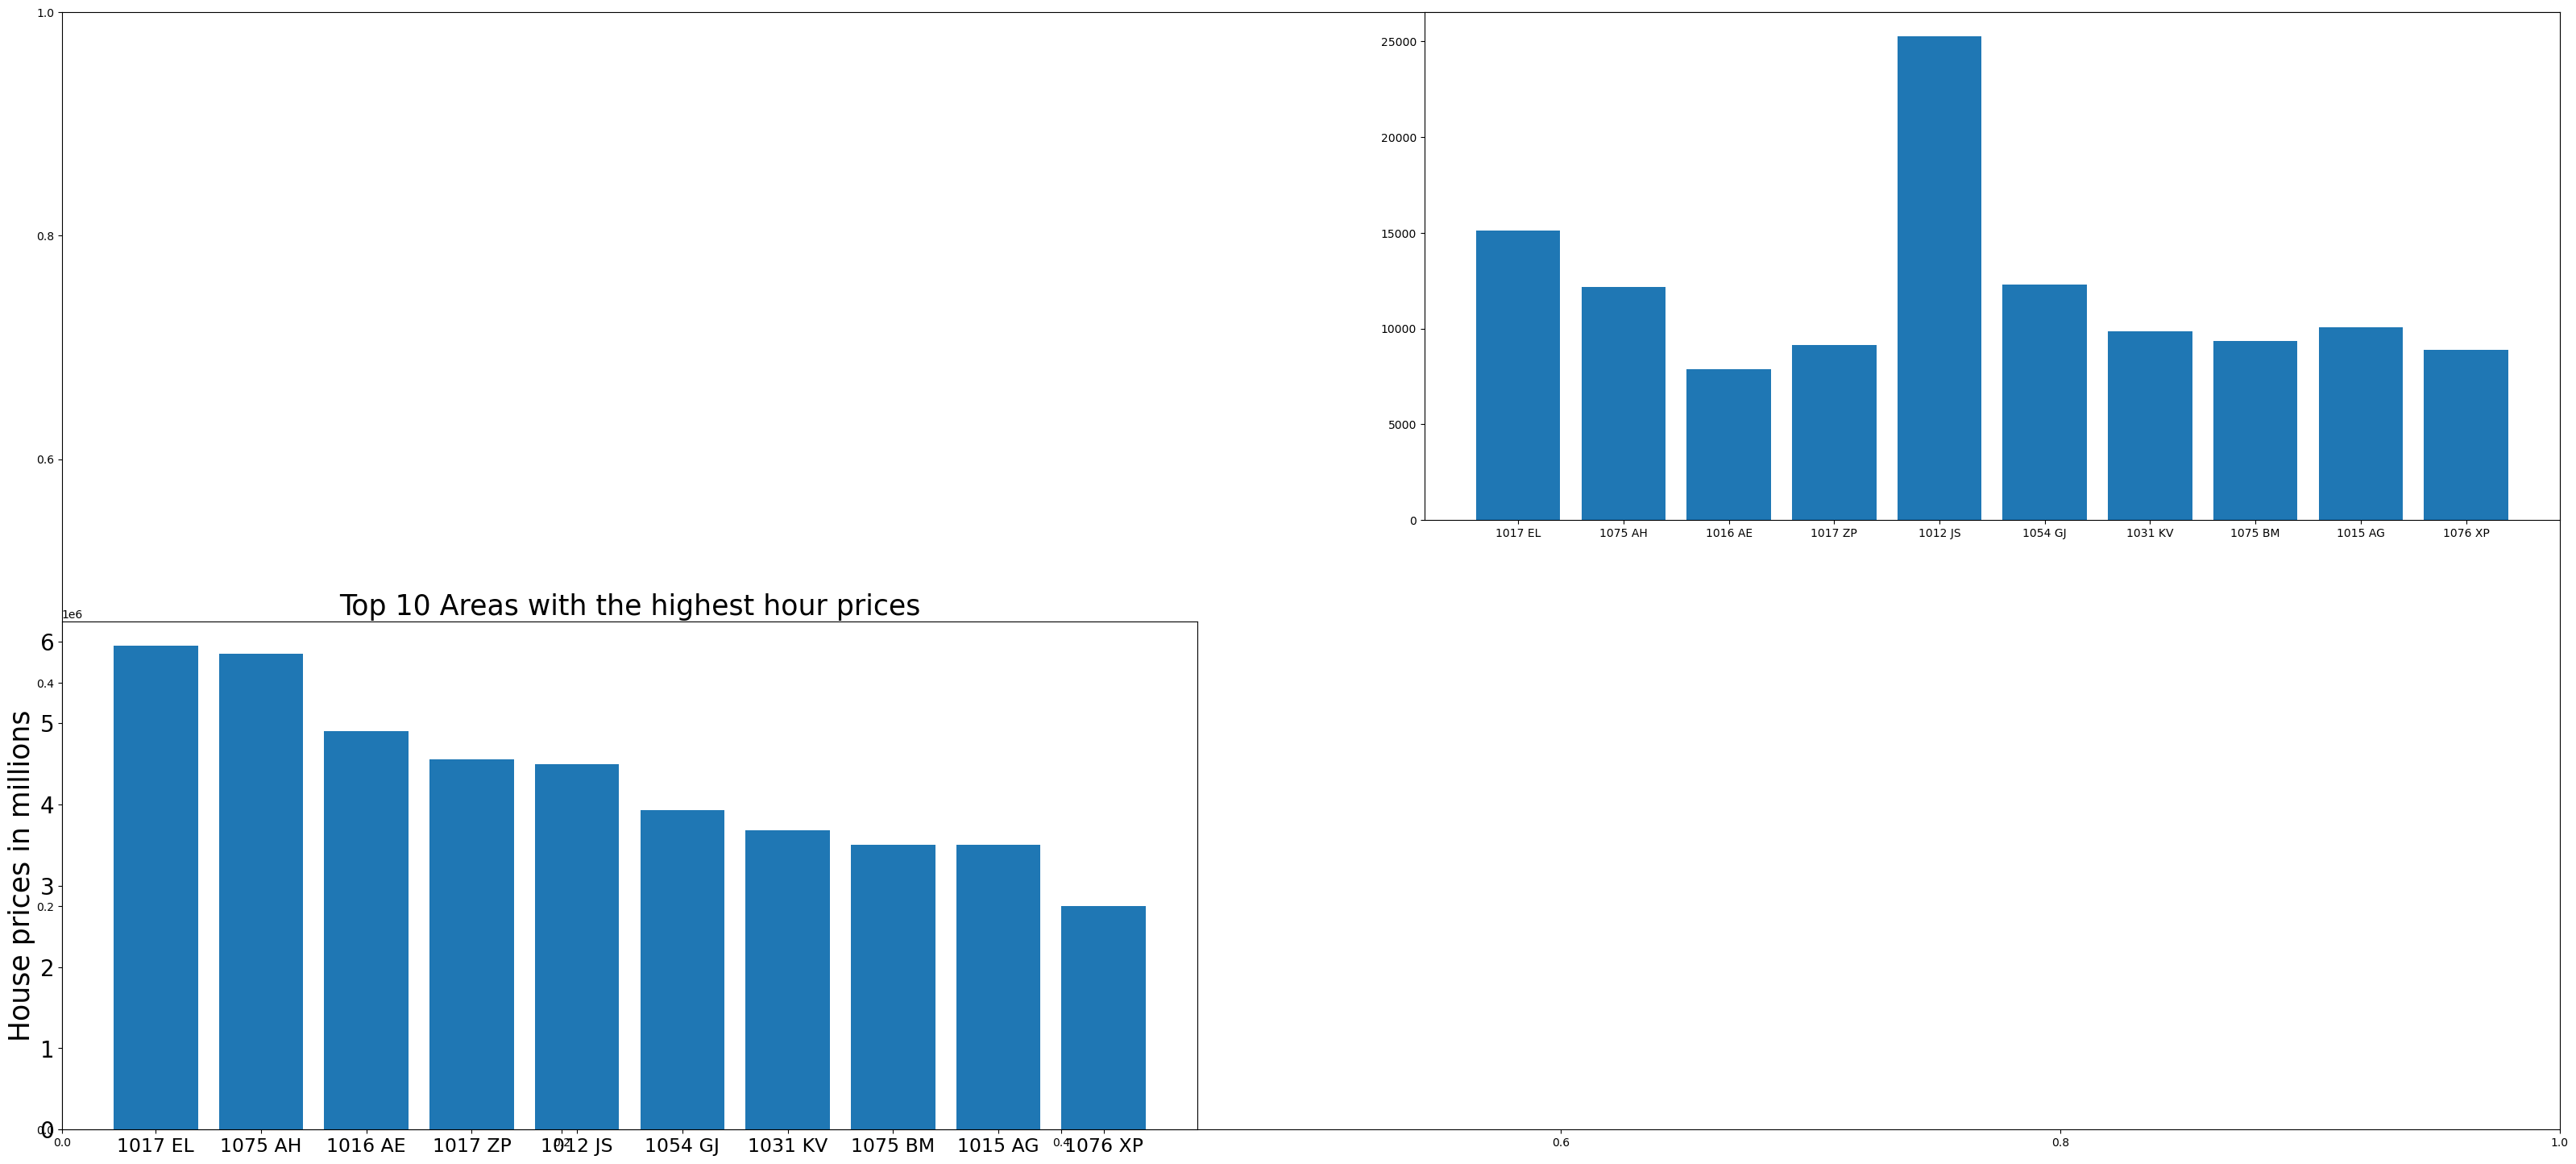

In [21]:
fig, ax = plt.subplots(figsize=(40, 18))

x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['PriceperSqm'][0:10]

plt.subplot(2, 2, 3)
plt.bar(x, y)

plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest hour prices', fontsize=25)

plt.subplot(2, 2, 2)
plt.bar(x, y1)

# Visualizing data in seaborm

In [22]:
import seaborn as sns

<Axes: xlabel='Zip', ylabel='Price'>

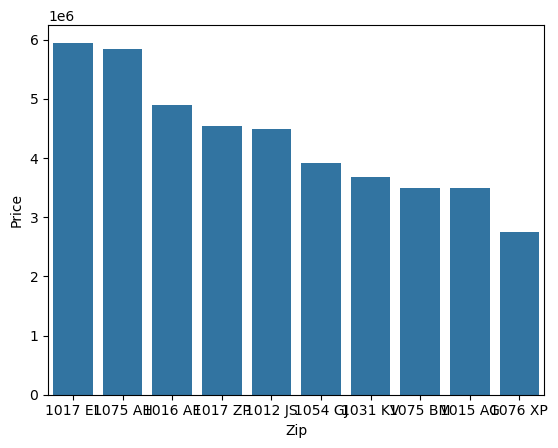

In [24]:
# plt.figure(figsize=(12, 6))

data = houseprices_sorted[0: 10]

sns.barplot(data=data, x='Zip', y ='Price')

Text(0.5, 0, 'Zip Code')

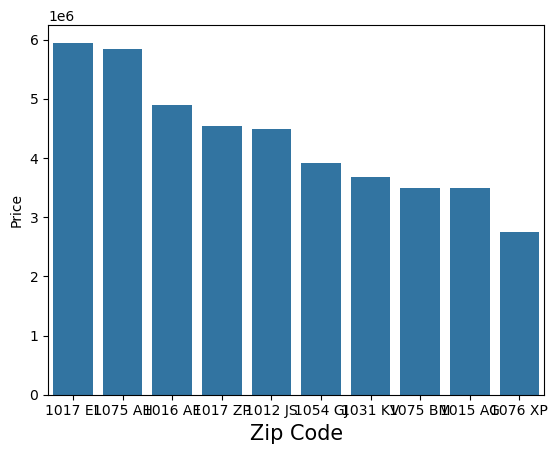

In [25]:
ax = sns.barplot(data=data, x='Zip', y='Price')

ax.set_xlabel('Zip Code', fontsize=15)

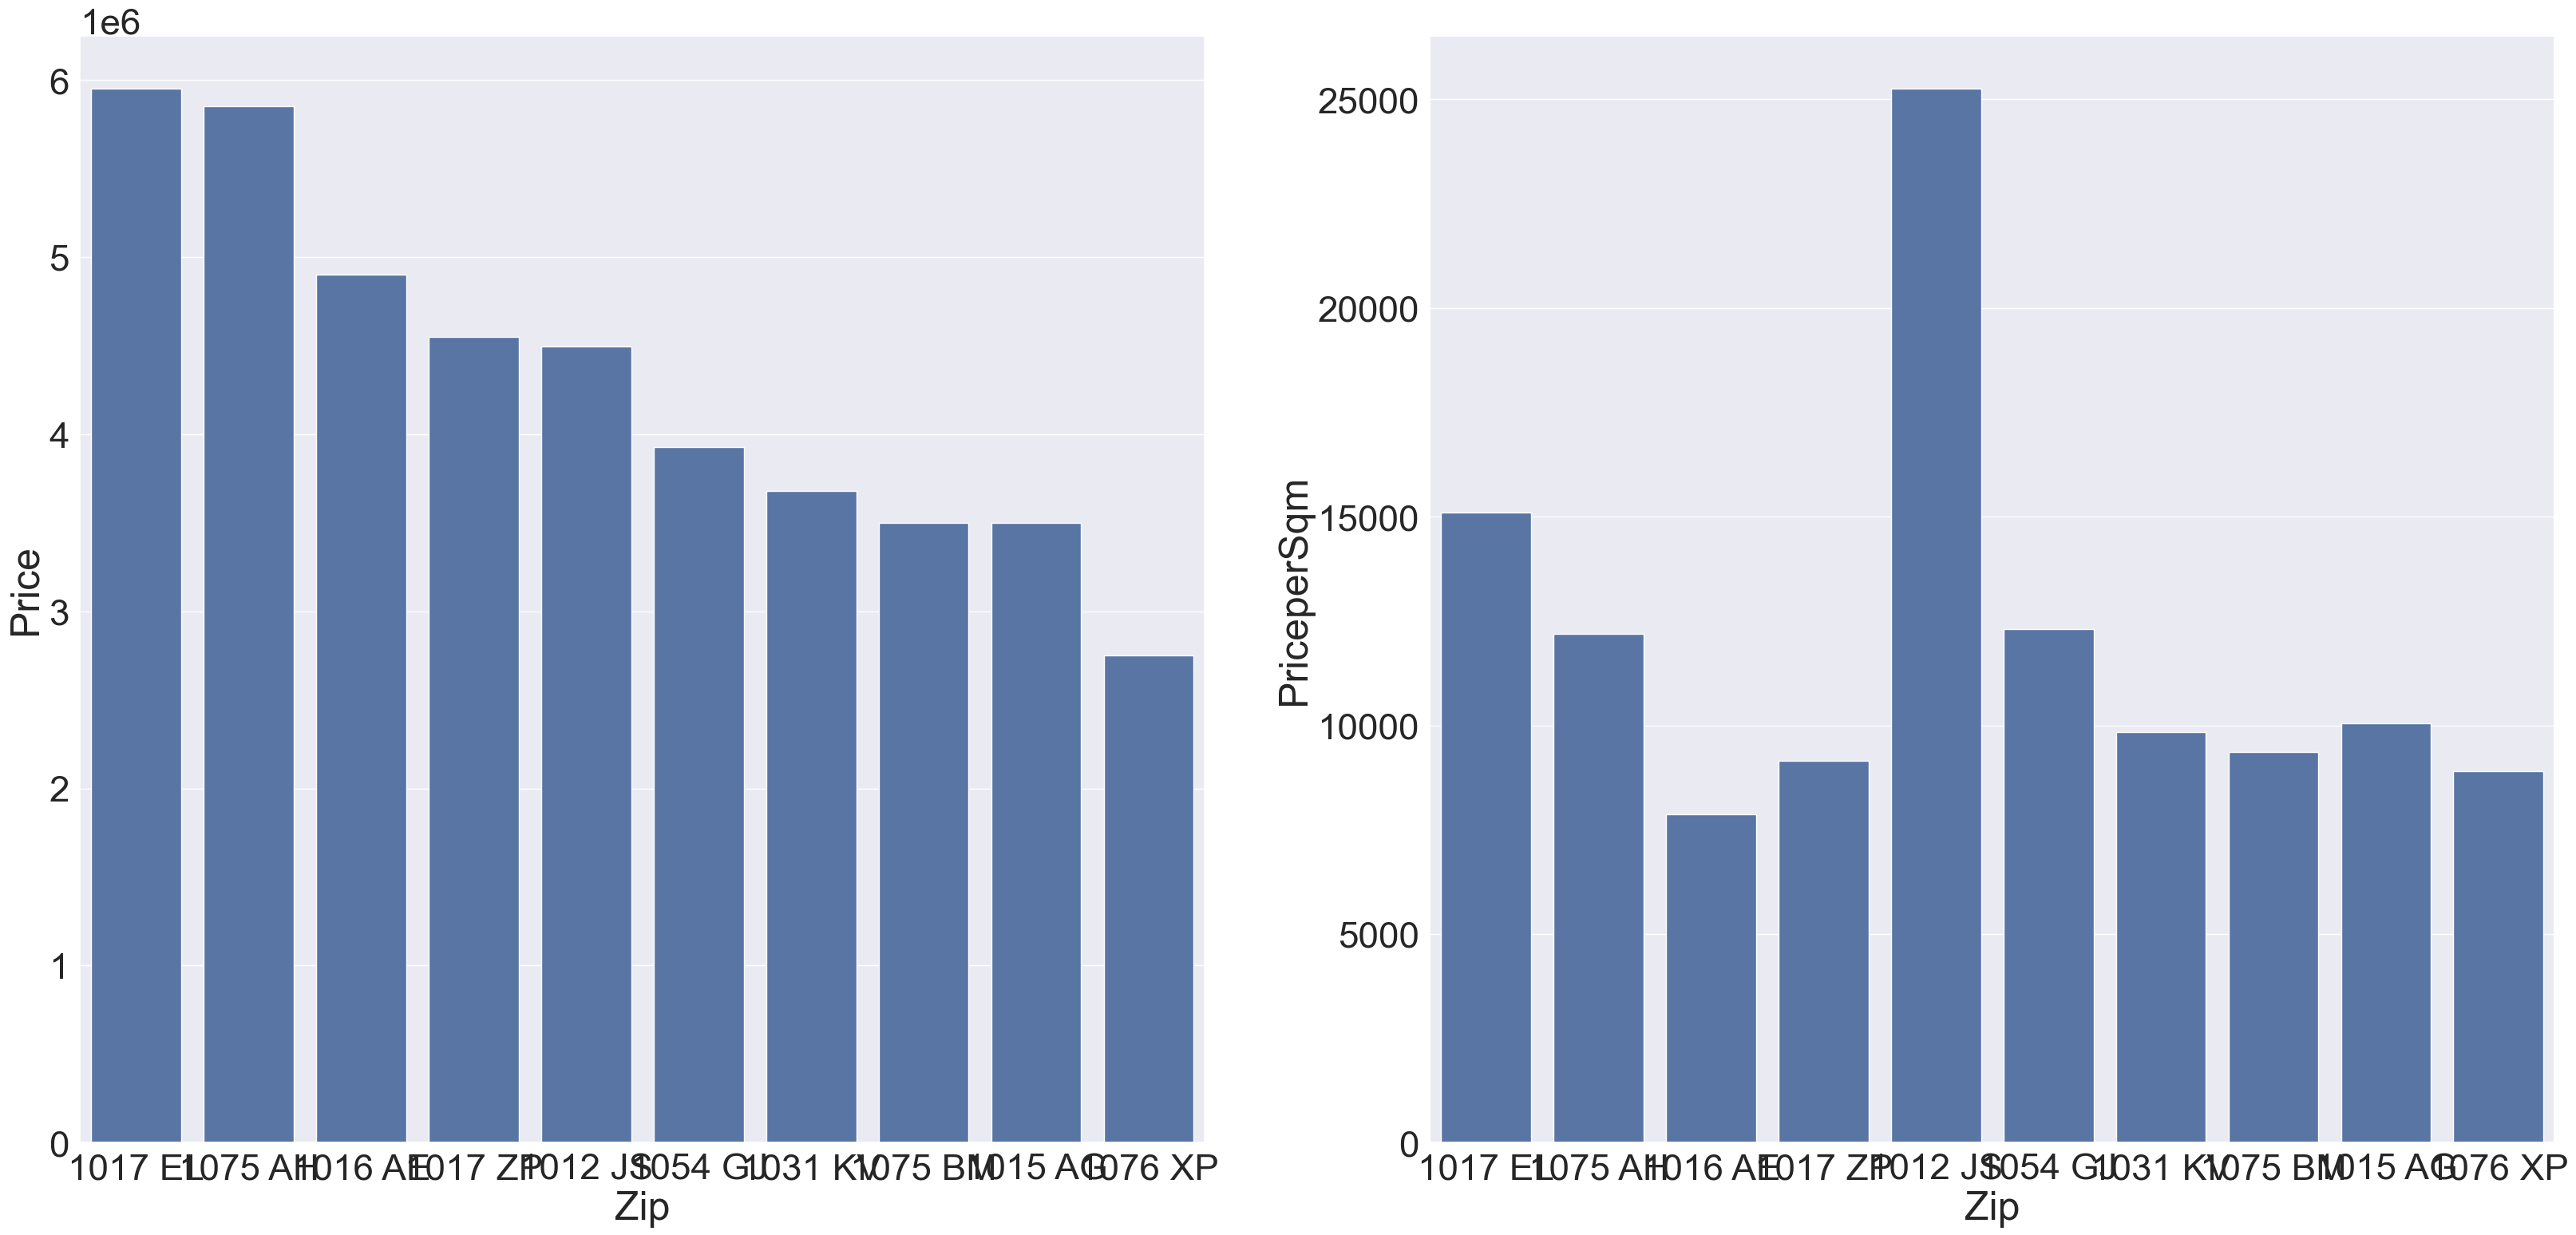

In [32]:
fig, ax = plt.subplots(1,2, figsize=(40, 18))

data = houseprices_sorted[0:10]

sns.set(font_scale = 3)
ax1 = sns.barplot(data=data, x = 'Zip', y='Price', ax=ax[0])

ax2 = sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1])

# Visualizing data in GGPlot

In [1]:
import pandas as pd
from plotnine import *

In [5]:
houseprices_data = pd.read_csv('./data/HousingPrices-Amsterdam-August-2021.csv')

houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]

houseprices_sorted = houseprices_data.sort_values('Price', ascending=False)

chart_data = houseprices_sorted[0:10]



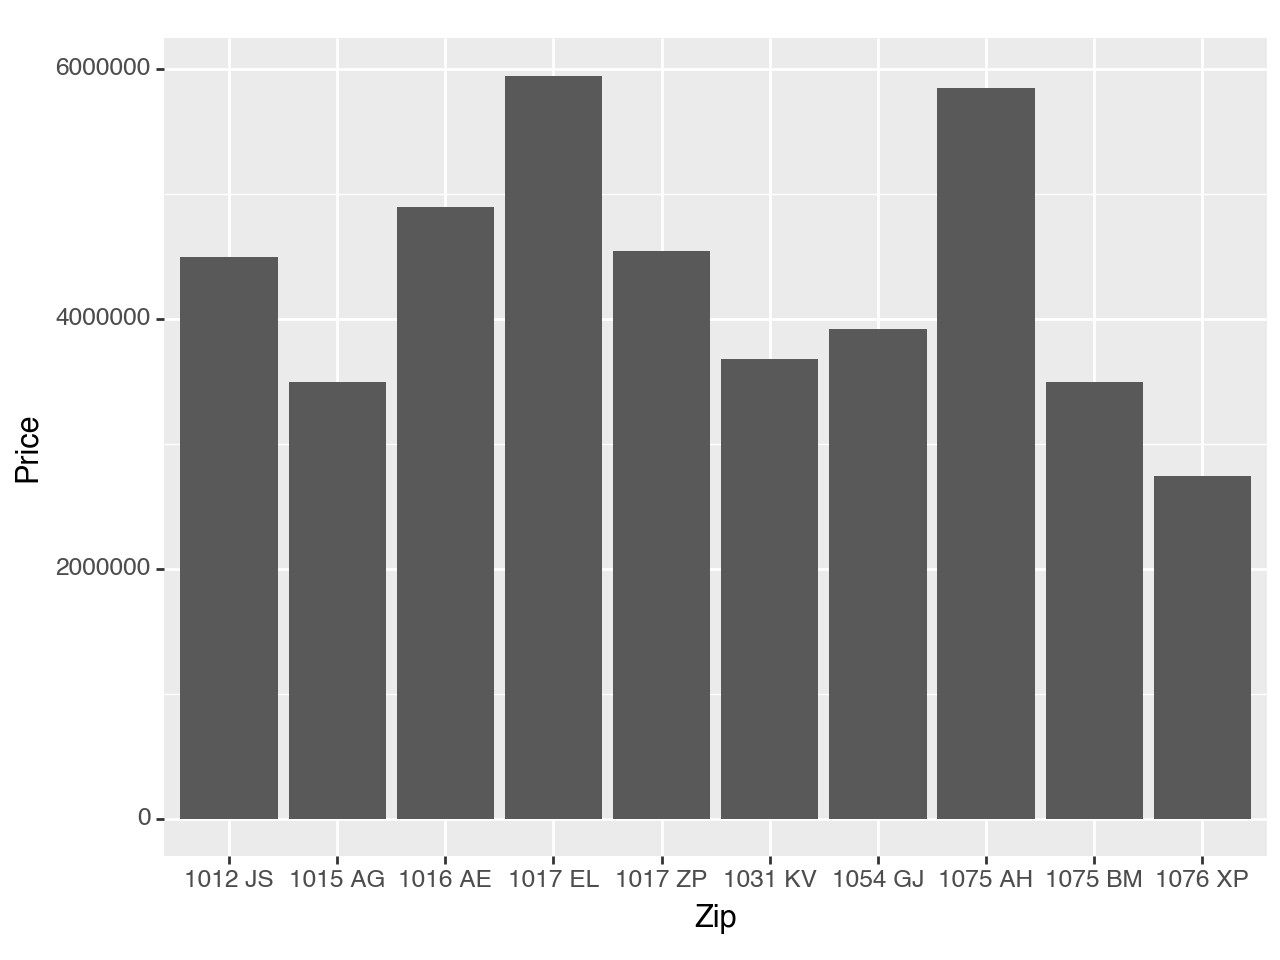

<Figure Size: (640 x 480)>

In [9]:
ggplot(chart_data, aes(x='Zip', y='Price')) + geom_bar(stat = 'identity')

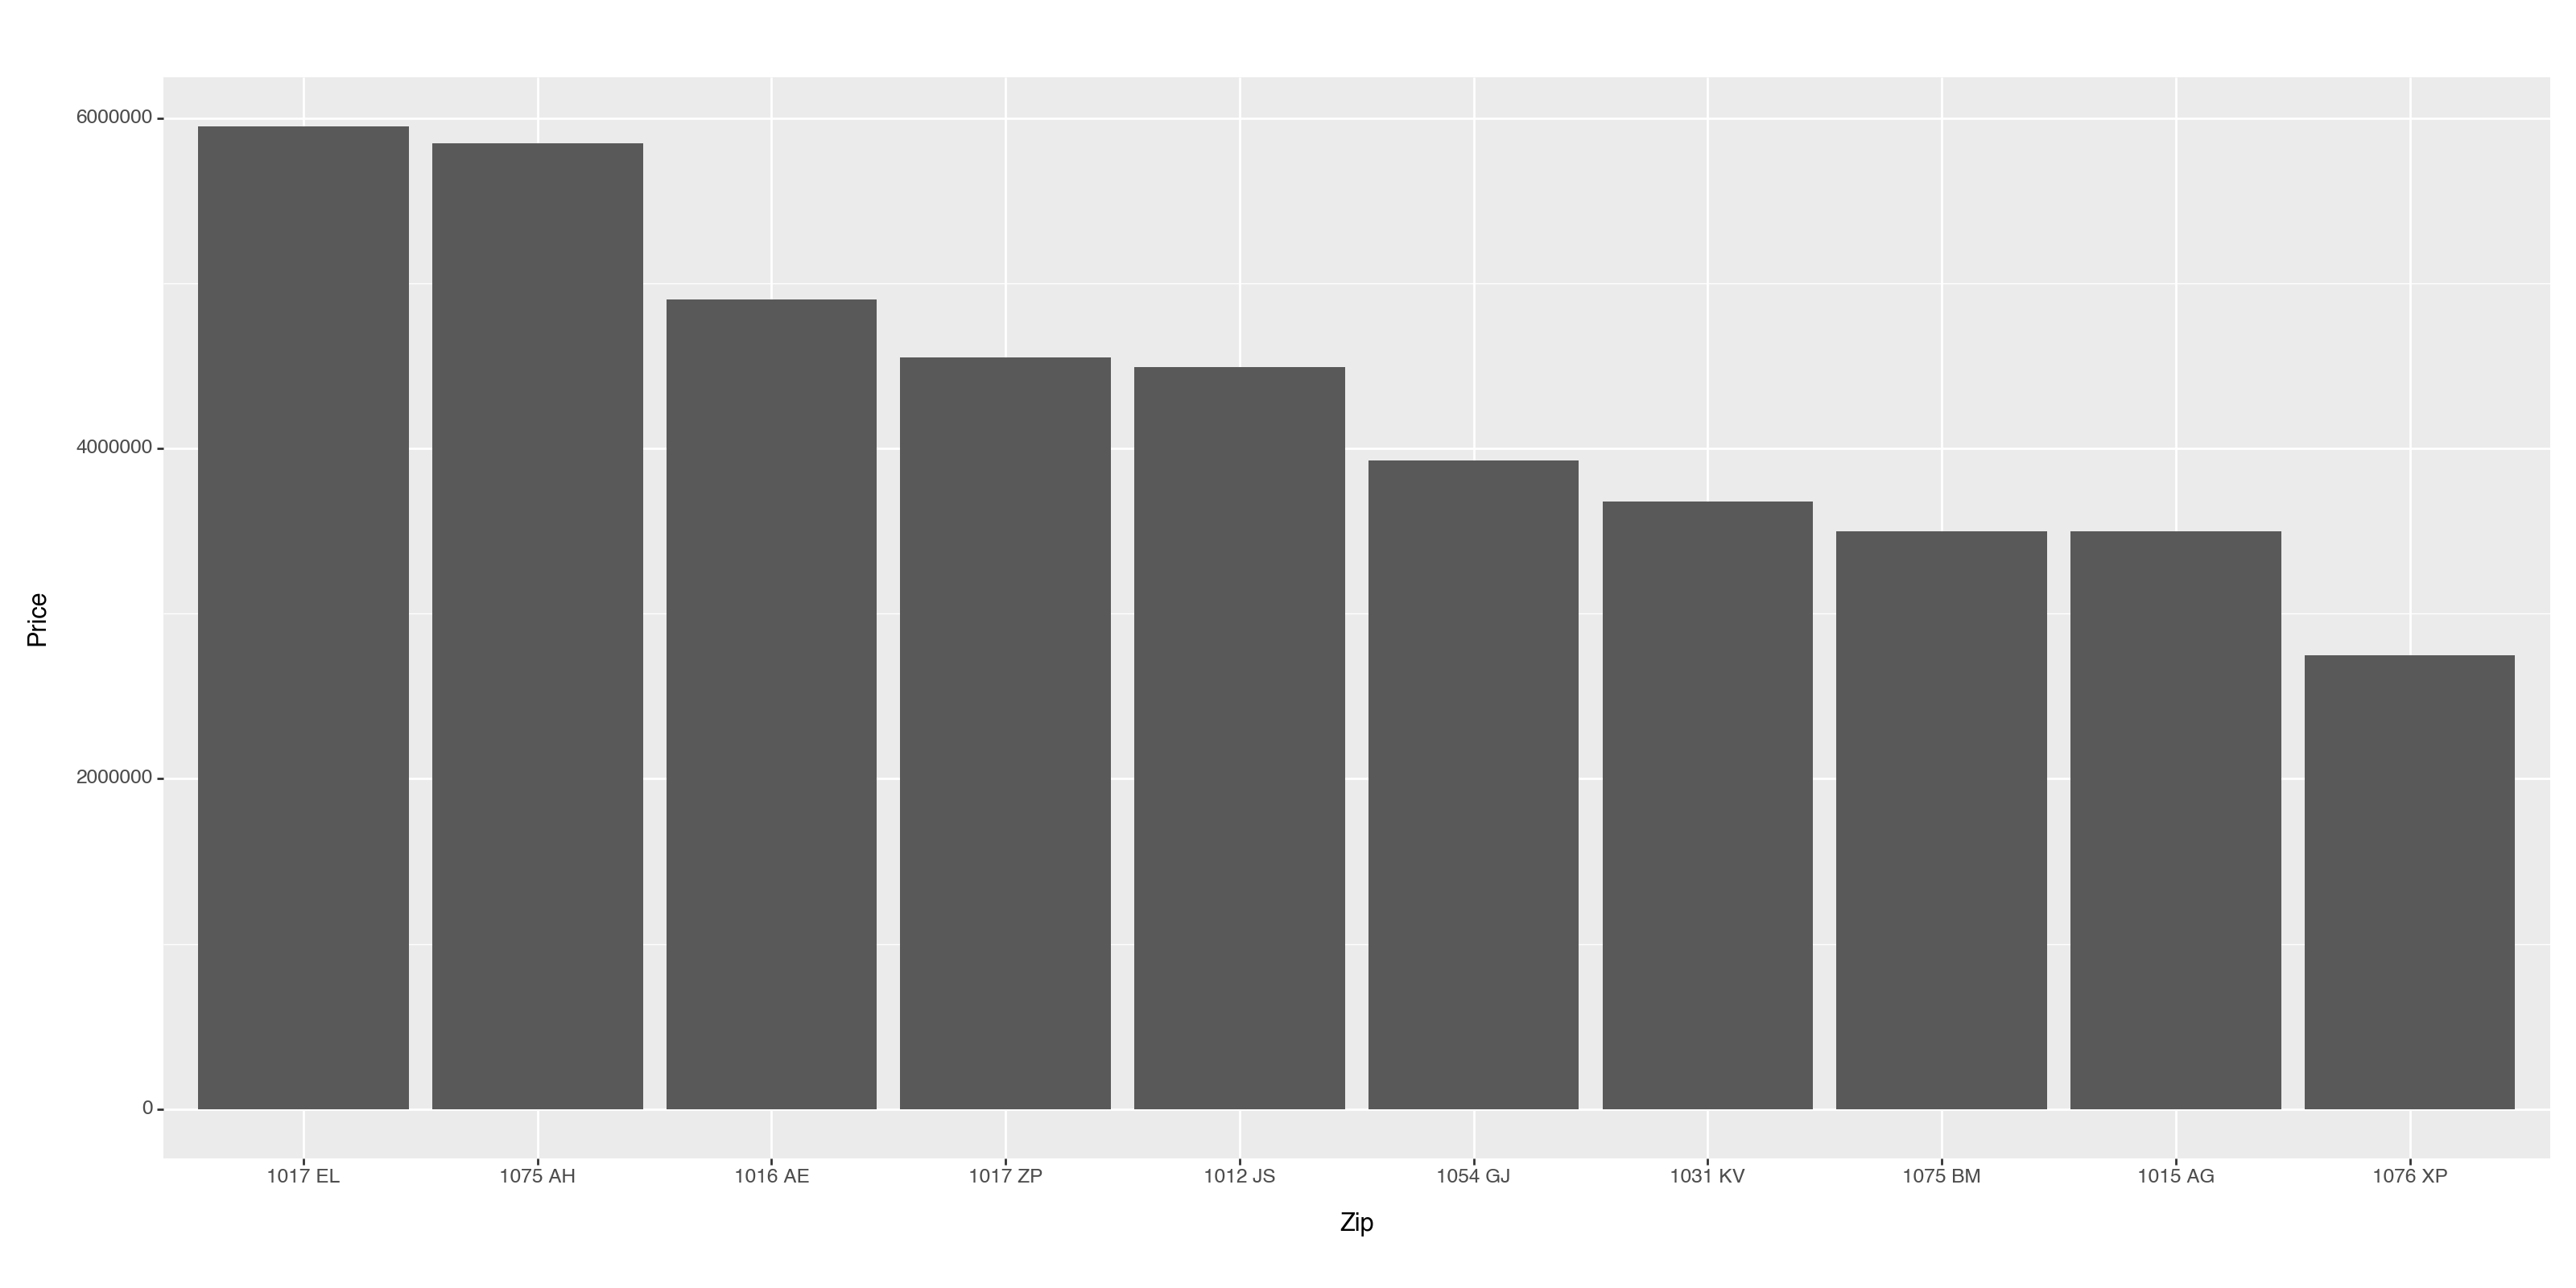

<Figure Size: (1600 x 800)>

In [10]:
ggplot(chart_data, aes(x='Zip', y='Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits = chart_data['Zip'].tolist()) + theme(figure_size=(16,8))

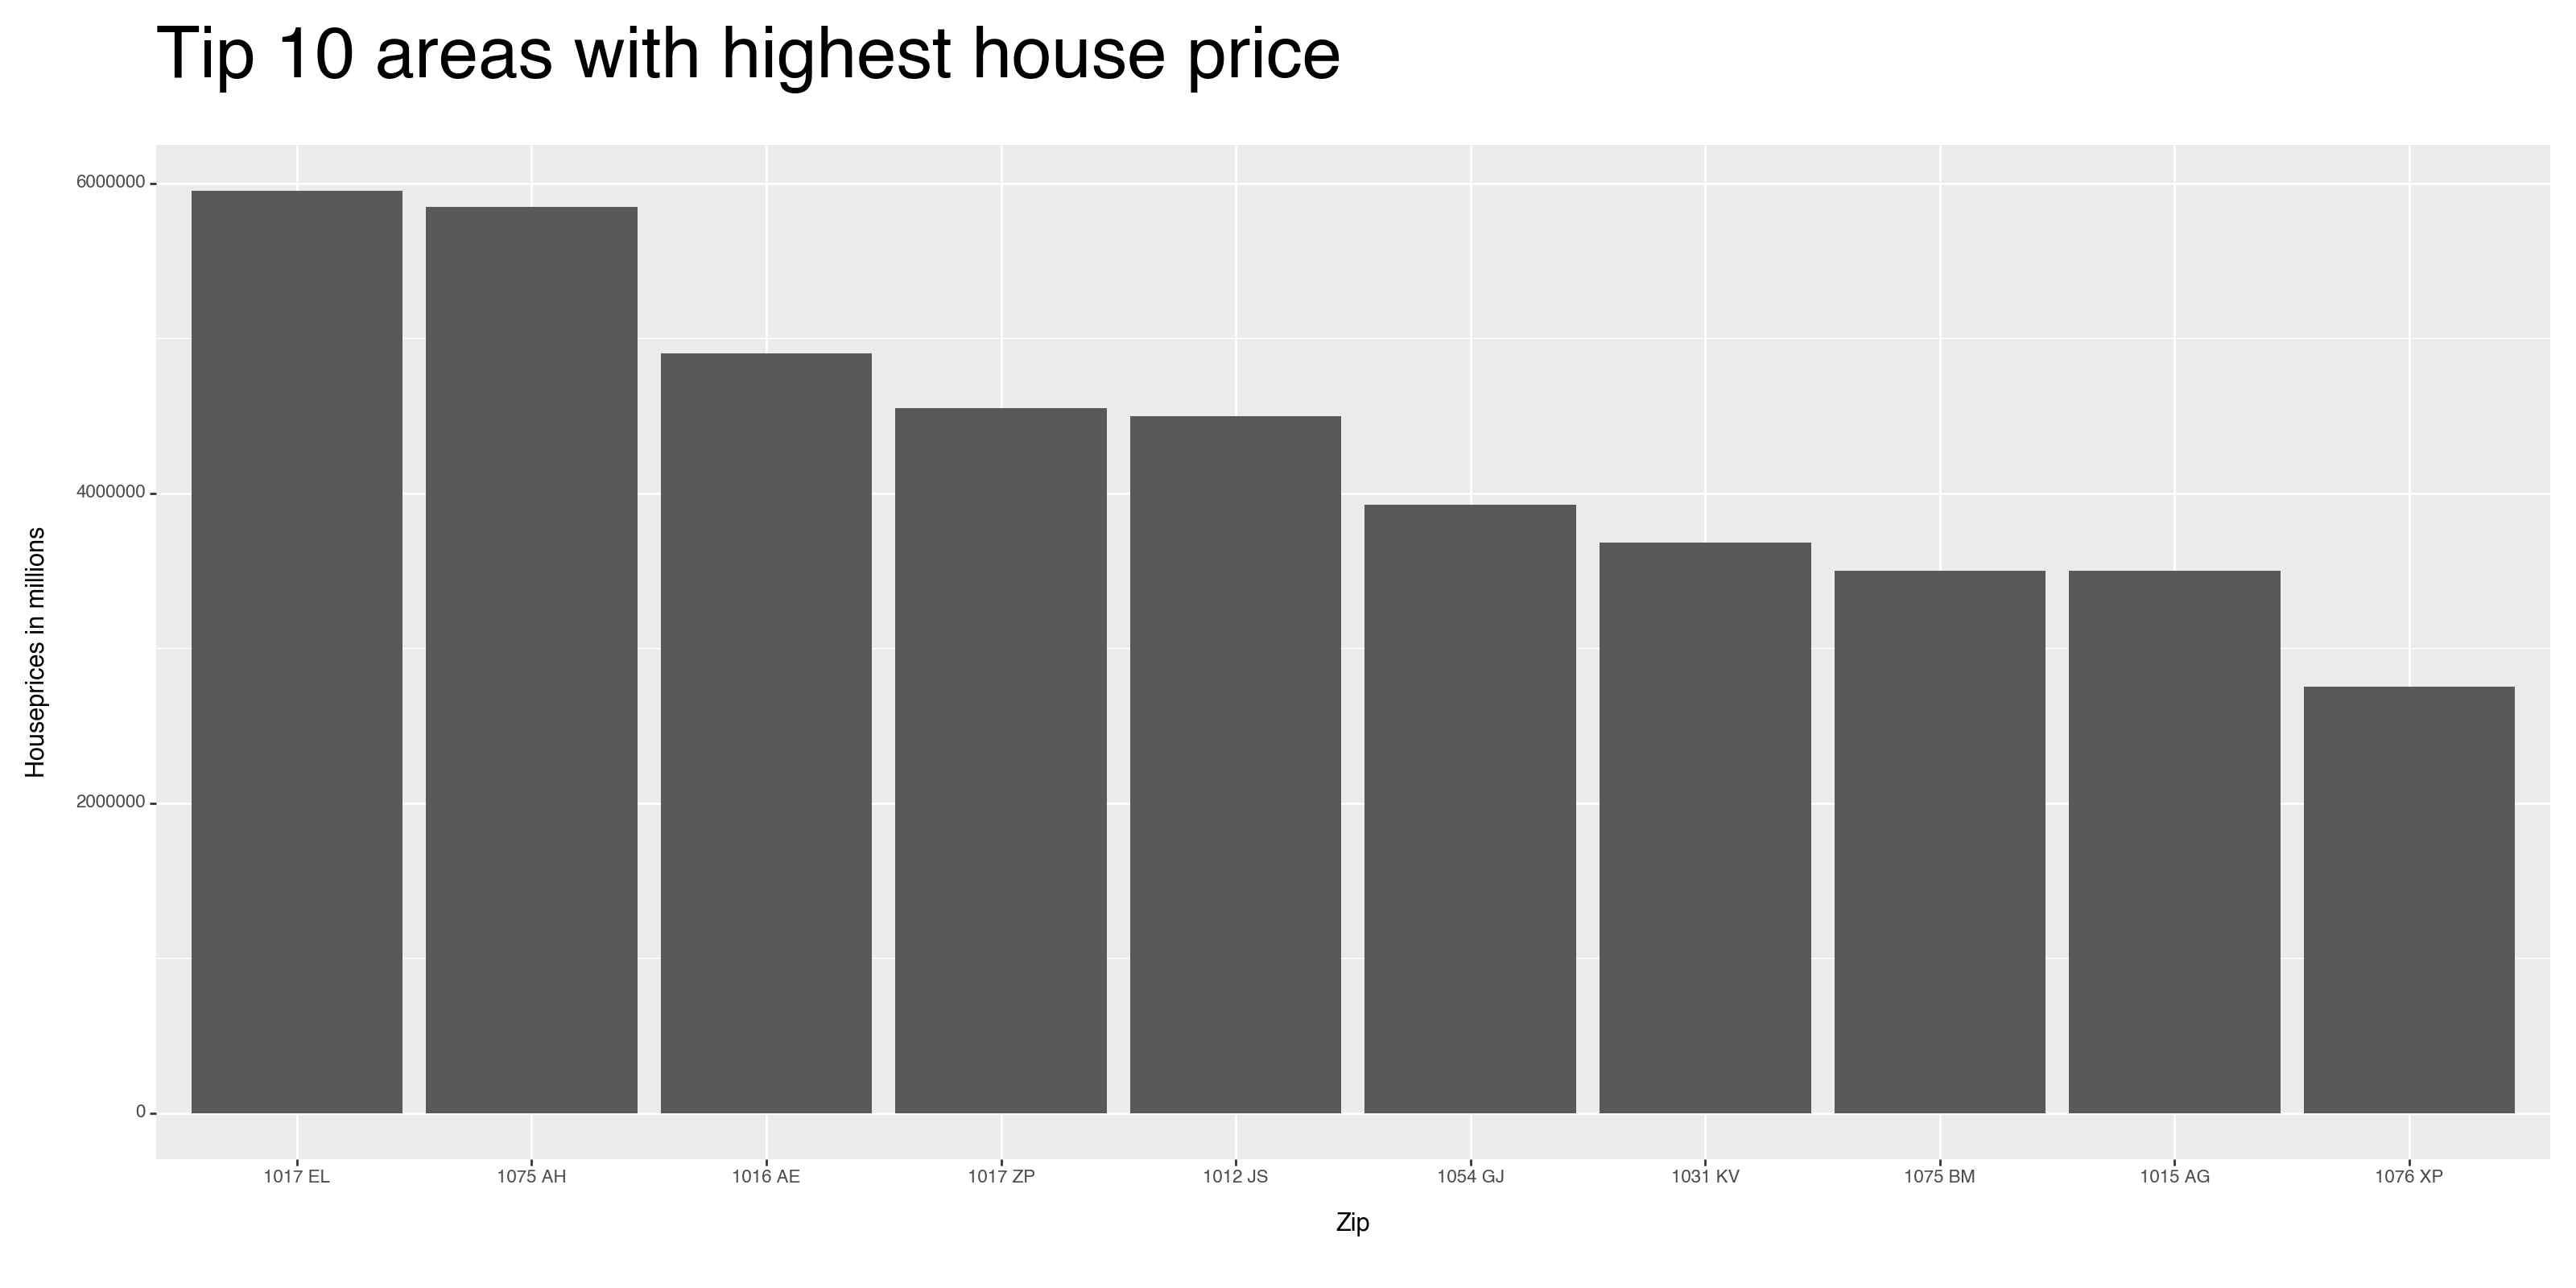

<Figure Size: (1600 x 800)>

In [19]:
ggplot(chart_data, aes(x='Zip', y='Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits = chart_data['Zip'].tolist()) + \
    labs(y='Houseprices in millions', title='Tip 10 areas with highest house price') + \
    theme(
    figure_size=(16,8),
    plot_title=element_text(face='bold', size=32),
    axis_text = element_text(face='italic', size=8)) 

# Visualizing data in Bokeh


In [20]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [30]:
fig = figure(x_range = chart_data['Zip'], x_axis_label='Zip Code', title = 'Top 10')
fig.vbar(x = chart_data['Zip'], top = chart_data['Price'], width=0.9)

fig.xaxis.axis_label_text_font_size = '35pt'

show(fig)